<h2 align=center> Principal Component Analysis</h2>

###  Load the Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
iris = pd.read_csv('iris_dataset.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visualizing the Data
---

<Axes: xlabel='petal_length', ylabel='petal_width'>

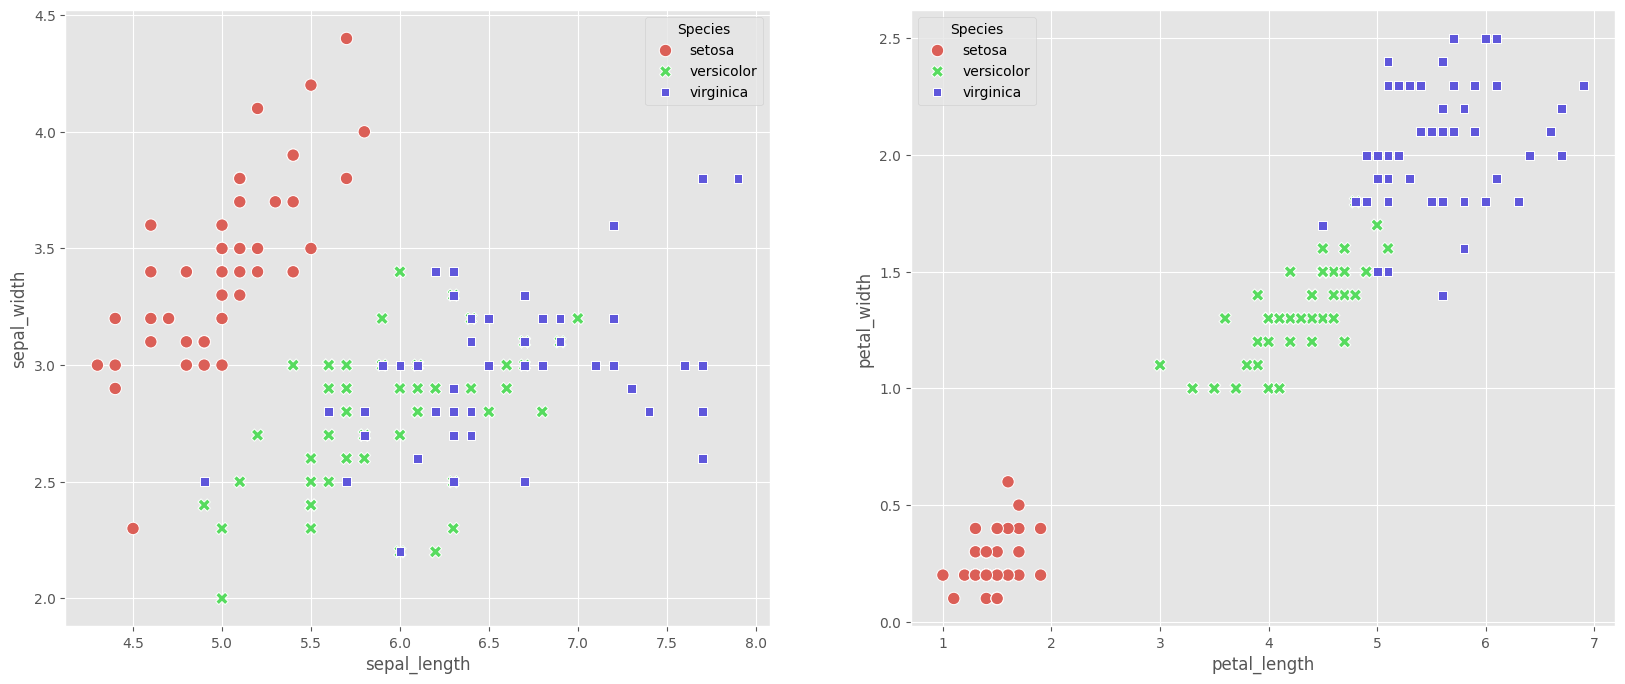

In [4]:
plt.figure(figsize=(20, 8))  

plt.subplot(1, 2, 1)
sns.scatterplot(x=iris['sepal_length'],y=iris['sepal_width'],hue=iris['Species'],style=iris['Species'],palette='hls',s=80)
plt.subplot(1, 2, 2)
sns.scatterplot(x=iris["petal_length"],y=iris['petal_width'],hue=iris['Species'],style=iris['Species'],palette='hls',s=80)

### Standardizing the Dataset
---

In [5]:
x = iris.drop(columns='Species')
y = iris['Species']

In [6]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

### Computing the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [7]:
covariance_matrix = np.cov(x_scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [8]:
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)

In [9]:
print("Eigenvectors:\n",eigen_vectors,"\n")
print("Eigenvalues:\n",eigen_values,"\n")

Eigenvectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues:
 [2.93035378 0.92740362 0.14834223 0.02074601] 



### Singular Value Decomposition (SVD)
---

returns standard deviation and variance instead of eigen values

In [10]:
eigen_vector_svd,s,v = np.linalg.svd(x_scaled.T)
eigen_vector_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

this result is similar to what we got above. The only difference is different sign but it doesnt matter because it depicts direction of vector

### Picking Principal Components Using the Explained Variance
---

In [11]:
for value in eigen_values:
    print(value)

2.930353775589314
0.9274036215173412
0.14834222648163967
0.02074601399559621


In [14]:
percentage_variance = [(i/sum(eigen_values))*100 for i in eigen_values]
percentage_variance

[72.77045209380132, 23.03052326768065, 3.6838319576273864, 0.5151926808906394]

In [ ]:
cumulative_variance = np.cumsum(percentage_variance)
cumulative_variance

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

Text(0, 0.5, ' % Cumulative Variance explained by PCs')

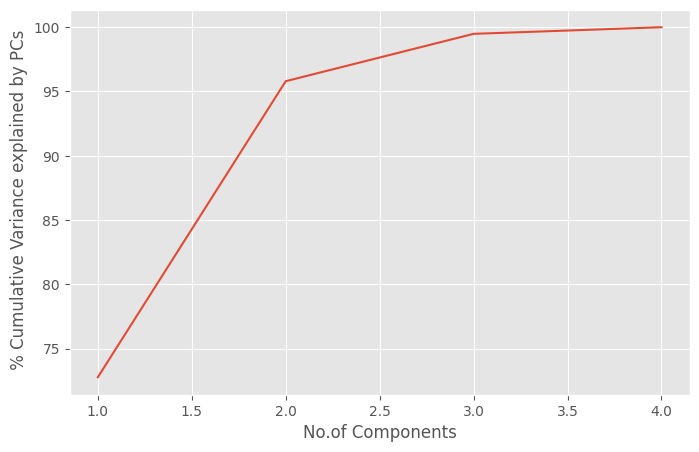

In [34]:
plt.figure(figsize=(8, 5)) 
sns.lineplot(x=[1,2,3,4],y =cumulative_variance)
plt.xlabel('No.of Components')
plt.ylabel(' % Cumulative Variance explained by PCs')

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---